<a href="https://colab.research.google.com/github/DasSagor/Machine-Learning/blob/main/Module_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
dataset = files.upload()

df = pd.read_csv('heart.csv')

df.head()



Saving heart.csv to heart.csv


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
# this is from module 07
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Sex'] = le.fit_transform(df['Sex'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])


cat_cols = ['ChestPainType','RestingECG','ST_Slope']

df_heart_encoded = pd.get_dummies(df,columns=cat_cols,dtype=int)

df_heart_encoded.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,0,1,0,0,0,1,0,0,0,1
1,49,0,160,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,1,130,283,0,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1
3,48,0,138,214,0,108,1,1.5,1,1,0,0,0,0,1,0,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,0,1,0,0,1,0,0,0,1


### Outliers Detection

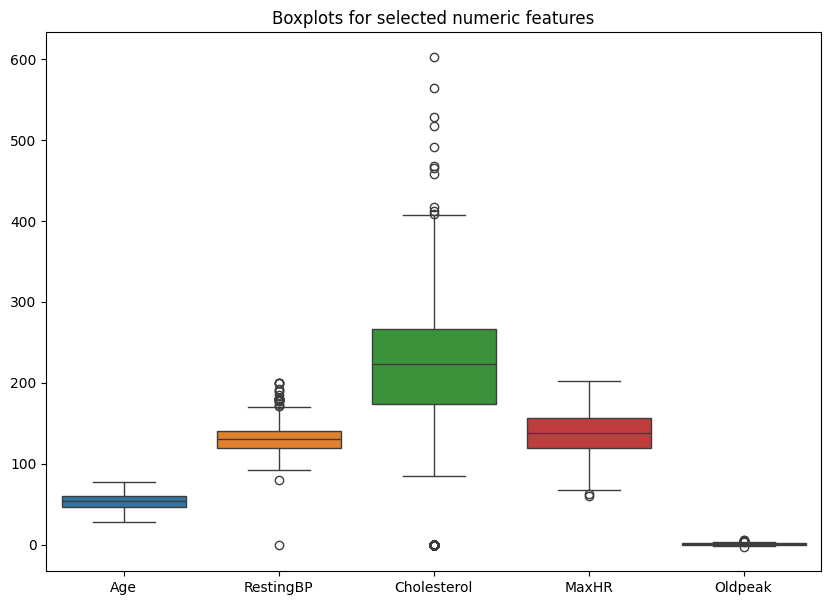

In [ ]:
# Visualize some numeric columns

numeric_cols = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']

plt.figure(figsize=(10,7))
sns.boxplot(data=df_heart_encoded[numeric_cols])
plt.title('Boxplots for selected numeric features')
plt.show()

In [ ]:
# Use IQR method on Cholesterol as an Example

col = 'Cholesterol'
q1 = df[col].quantile(0.25)
q3 = df[col].quantile(0.75)
IQR = q3 - q1

lower = q1 -1.5*IQR
upper = q3 + 1.5*IQR

outliers = df[(df[col]<lower) | (df[col]> upper)]
print(f'Number of detected outliers in {col}: ', len(outliers))

Number of detected outliers in Cholesterol:  183


In [ ]:
print(lower,upper)

32.625 407.625


### Outliers handling

In [ ]:
# Remove Outliers
df_no_outliers = df[(df[col]>=lower) & (df[col]<= upper)]

print(len(df_no_outliers))

# Cap Outliers (winsorization-like approach)
df_capped = df.copy()
df_capped[col] = df_capped[col].clip(lower,upper)


# Log transform the column (for skewed distributions)
df_log = df.copy()

df_log[col + '_log'] = np.log(df[col]+1)

df_log


735


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Cholesterol_log
0,40,1,ATA,140,289,0,Normal,172,0,0.0,Up,0,5.669881
1,49,0,NAP,160,180,0,Normal,156,0,1.0,Flat,1,5.198497
2,37,1,ATA,130,283,0,ST,98,0,0.0,Up,0,5.648974
3,48,0,ASY,138,214,0,Normal,108,1,1.5,Flat,1,5.370638
4,54,1,NAP,150,195,0,Normal,122,0,0.0,Up,0,5.278115
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,TA,110,264,0,Normal,132,0,1.2,Flat,1,5.579730
914,68,1,ASY,144,193,1,Normal,141,0,3.4,Flat,1,5.267858
915,57,1,ASY,130,131,0,Normal,115,1,1.2,Flat,1,4.882802
916,57,0,ATA,130,236,0,LVH,174,0,0.0,Flat,1,5.468060


### Extraa for better learning

[4.49980967 4.60517019 4.70048037 4.72738782 4.66343909 5.70378247
 4.70048037 4.58496748 4.55387689 4.77068462 4.81218436 6.39692966
 4.65396035 4.48863637 4.24849524]


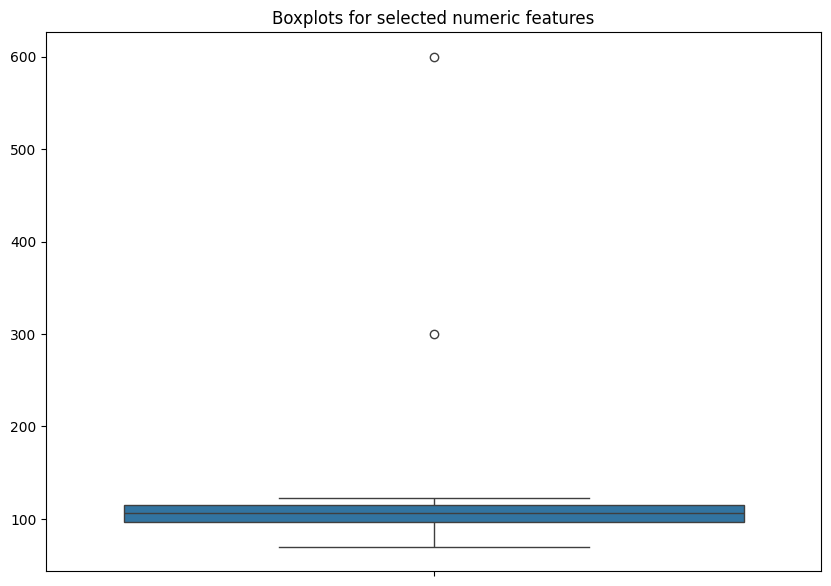

In [ ]:
numeric_cols2 = [90,100,110,113,106,300,110,98,95,118,123,600,105,89,70]

num_log = np.log(numeric_cols2)

print(num_log)

plt.figure(figsize=(10,7))
sns.boxplot(data=numeric_cols2)
plt.title('Boxplots for selected numeric features')
plt.show()

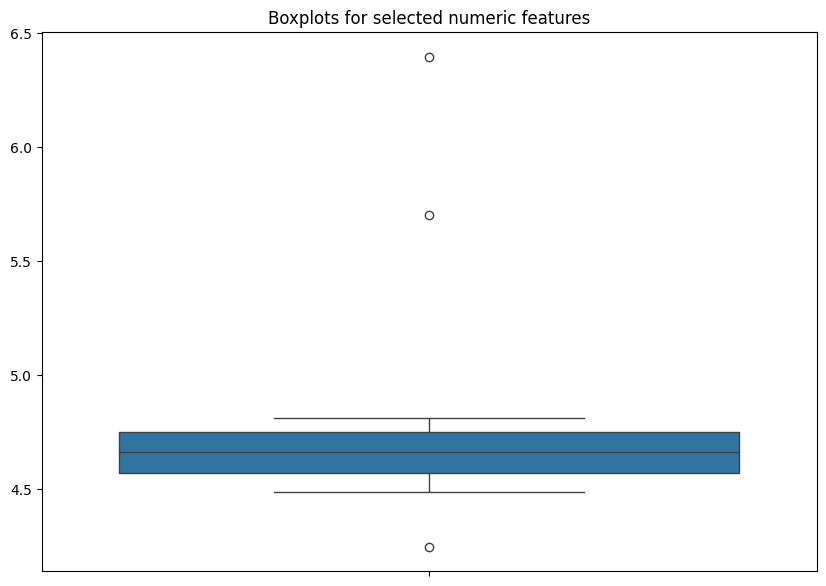

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=num_log)
plt.title('Boxplots for selected numeric features')
plt.show()

### Feature Transformation

In [ ]:
# Polynomial features using Age and MaxHR (if available)
from sklearn.preprocessing import PolynomialFeatures

poly_col = ['Age','MaxHR']
poly = PolynomialFeatures(degree=2,include_bias=False)

poly_features = poly.fit_transform(df[poly_col])
poly_features_names = poly.get_feature_names_out(poly_col)

print(poly_features_names)

['Age' 'MaxHR' 'Age^2' 'Age MaxHR' 'MaxHR^2']


In [ ]:
# Binning Age into categories (Young, Middle, Old)
df['Age_bin'] = pd.cut(df['Age'], bins=[0,30,50,100],labels=['Young','Middle','Old'])

print(df[['Age','Age_bin']].head(10))

   Age Age_bin
0   40  Middle
1   49  Middle
2   37  Middle
3   48  Middle
4   54     Old
5   39  Middle
6   45  Middle
7   54     Old
8   37  Middle
9   48  Middle


In [ ]:
# Domain-driven risk categories for RestingBP and Oldpeak

def bp_risk(bp):
    if bp<120:
        return 'Normal'
    elif bp<140:
        return 'Elevated'
    else:
        return 'High'

def oldpeak_risk(op):
    if op == 0:
        return 'No Stress'
    elif op<2:
        return 'Moderate Stress'
    else:
        return 'High Stress'


df['BP_risk'] = df['RestingBP'].apply(bp_risk)
df['Oldpeak_risk'] = df['Oldpeak'].apply(oldpeak_risk)

df[['RestingBP','BP_risk','Oldpeak','Oldpeak_risk']]


,RestingBP,BP_risk,Oldpeak,Oldpeak_risk
0,140,High,0.0,No Stress
1,160,High,1.0,Moderate Stress
2,130,Elevated,0.0,No Stress
3,138,Elevated,1.5,Moderate Stress
4,150,High,0.0,No Stress
...,...,...,...,...
913,110,Normal,1.2,Moderate Stress
914,144,High,3.4,High Stress
915,130,Elevated,1.2,Moderate Stress
916,130,Elevated,0.0,No Stress


### Putting It All Together in a Preprocessing Pipeline

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define numeric and categorical columns for the pipeline

num_features = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
cat_features = ['Sex','ExerciseAngina','ChestPainType','RestingECG','ST_Slope']

# Numeric pipeline
num_pipeline = Pipeline([('scaler',StandardScaler())])


# Categorical Pipeline
cat_pipeline = Pipeline([('ohe',OneHotEncoder(drop='first'))])


# Combine both
preprocess = ColumnTransformer([
    ('num',num_pipeline,num_features),
    ('cat',cat_pipeline,cat_features)
])

# Full pipeline with a simple model

clf = Pipeline([
    ('prep',preprocess),
    ('model',LogisticRegression(max_iter=1000))
])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Train-Test split using original df ( not already encoded)
target_col = "HeartDisease"

x = df.drop(columns=[target_col])
y = df[target_col]

x_train_pipe,x_test_pipe,y_train_pipe,y_test_pipe = train_test_split(x,y,test_size=0.25,random_state=42)


# Fit the full pipeline
clf.fit(x_train_pipe,y_train_pipe)


# Predict and evaluate

y_pred_pipe = clf.predict(x_test_pipe)
acc = accuracy_score(y_test_pipe,y_pred_pipe)
print('Logistic Regression with preprocessing pipeline: ',acc)

Logistic Regression with preprocessing pipeline:  0.8434782608695652
